<a href="https://colab.research.google.com/github/shweta7122/Sentiment-Analysis/blob/main/Twitter_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter Sentiment Analysis

**BUSINESS PROBLEM**

Sentiment analysis is contextual mining of text which identifies and extracts subjective information in source material and helping a business to understand the social sentiment of their brand, product or service while monitoring online conversations. The company has engaged key influencers to talk about the new product and would like to measure their levels of engagement.


**ANALYTICAL OBJECTIVE**


The main bbjective is to extract data from the tweets from the key influencers and study their tweets and understand the polarity and subjectivity of the statements made by them and also how many references they have made to the business brand that is being promoted here.

In [47]:
# Importing our libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer


In [48]:
# Uploading the twitter api login information to be able to scrape data
from google.colab import files
uploaded = files.upload()

Saving Login.csv to Login (2).csv


In [49]:
# Getting data from the login file to login
log = pd.read_csv('Login.csv')

In [50]:
consumerKey=log['key'][0]
consumerSecret=log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [51]:
# Creating the authentication data
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create the API object
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [52]:
# Extract 100 tweets from the twitter user
screen_name = "pcmag"
posts = api.user_timeline(screen_name = screen_name, count = 5000, lang ='en', tweet_mode="extended")


# Print the last 10 tweets from the account
print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[0:10]:
  print(str(i) + ') '+ tweet.full_text + '\n')
  i = i+1

Show the 10 recent tweets: 

1) Here's how to make sense of the dizzying mix of mobile processors on the market and get the most powerful laptop for your money. https://t.co/Jc3nE5i12m

2) You've probably got TikTok, like a billion other people.  https://t.co/f9OtpzRRAX

3) You’ve got several different choices for running Windows applications on your Mac. https://t.co/OZ13JapuvM

4) Facebook plans to create 10,000 new jobs in the European Union over the next five years as part of its budding "metaverse."  https://t.co/Lk0osvrjSp

5) Canon is facing a lawsuit that could force it to change how its all-in-one printers react to running out of ink.  https://t.co/OxERMVaVnG

6) Which PSU should you buy? This guide will give you a brief rundown of desktop power-supply lingo and basics here in 2021. https://t.co/eh81Dc56lp

7) These are the best robot vacuums you'll find for $300 or less. https://t.co/L5gxhsFrmj

8) Have you heard stories about PPL (people) giving texters who are ignorant of w

In [53]:
# Create a dataframe with a column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head(10)

,Tweets
0,Here's how to make sense of the dizzying mix o...
1,"You've probably got TikTok, like a billion oth..."
2,You’ve got several different choices for runni...
3,"Facebook plans to create 10,000 new jobs in th..."
4,Canon is facing a lawsuit that could force it ...
5,Which PSU should you buy? This guide will give...
6,These are the best robot vacuums you'll find f...
7,Have you heard stories about PPL (people) givi...
8,See all the buying advice you need to land the...
9,If your PC is sluggish or you're getting worry...


**Text Preprocessing and Visuaizations**

Clearly, the tweets contain a lot of noisy data that needs to be removed before we move forward with the analysis. The data and symbols as "RT"/ @ etc needs to be removed

In [54]:
# Clean the text

# Create a function to clean the texts
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removed Hastags
  text = re.sub(r'RT[\s]+', '', text) #Removed RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Removed hyperlinks

  return text


df['Tweets']=df['Tweets'].apply(cleanTxt)
df.head(10)

,Tweets
0,Here's how to make sense of the dizzying mix o...
1,"You've probably got TikTok, like a billion oth..."
2,You’ve got several different choices for runni...
3,"Facebook plans to create 10,000 new jobs in th..."
4,Canon is facing a lawsuit that could force it ...
5,Which PSU should you buy? This guide will give...
6,These are the best robot vacuums you'll find f...
7,Have you heard stories about PPL (people) givi...
8,See all the buying advice you need to land the...
9,If your PC is sluggish or you're getting worry...


In [55]:
# Create a function to get the functionality
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe

df

,Tweets,Subjectivity,Polarity
0,Here's how to make sense of the dizzying mix o...,0.750000,0.400000
1,"You've probably got TikTok, like a billion oth...",0.375000,-0.125000
2,You’ve got several different choices for runni...,0.300000,0.000000
3,"Facebook plans to create 10,000 new jobs in th...",0.163636,0.059091
4,Canon is facing a lawsuit that could force it ...,0.000000,0.000000
...,...,...,...
195,This huge TV retracts into the floor when you'...,0.900000,0.400000
196,A mechanical keyboard delivers the feel and fe...,0.500000,-0.166667
197,Get a full charge for an electric vehicle in j...,0.550000,0.350000
198,Need a new monitor? We've got recommendations ...,0.454545,0.136364


In [56]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

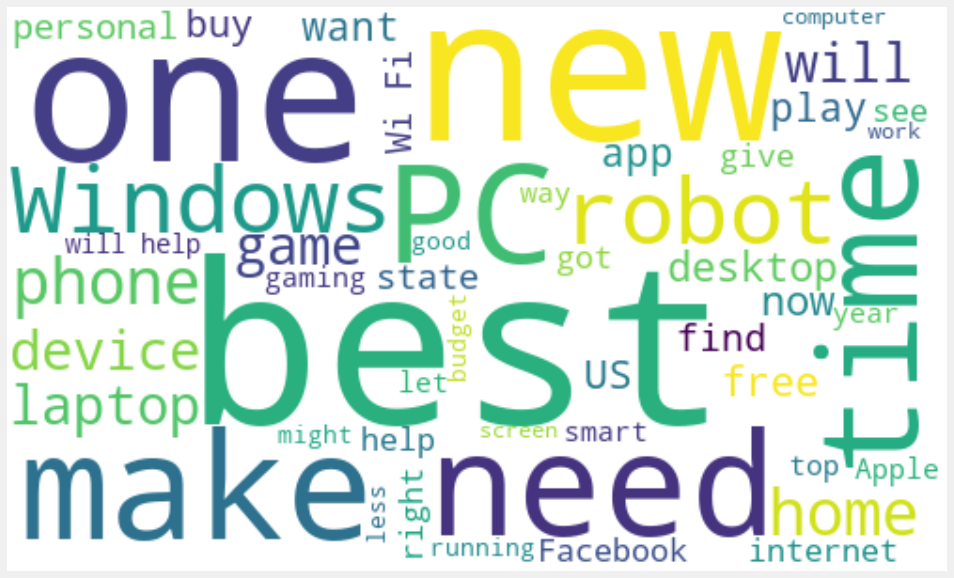

In [57]:
allWords = ' '.join( [twts for twts in df['Tweets']])
wordcloud = WordCloud(background_color='white', width=500, height=300, stopwords=stopwords,max_words=50, max_font_size=120, random_state=21).generate(allWords)

print(wordcloud)
fig = plt.figure(1, figsize=(15,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=100)

In [58]:
# Create a function to compute the sentiment analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Here's how to make sense of the dizzying mix o...,0.750000,0.400000,Positive
1,"You've probably got TikTok, like a billion oth...",0.375000,-0.125000,Negative
2,You’ve got several different choices for runni...,0.300000,0.000000,Neutral
3,"Facebook plans to create 10,000 new jobs in th...",0.163636,0.059091,Positive
4,Canon is facing a lawsuit that could force it ...,0.000000,0.000000,Neutral
...,...,...,...,...
195,This huge TV retracts into the floor when you'...,0.900000,0.400000,Positive
196,A mechanical keyboard delivers the feel and fe...,0.500000,-0.166667,Negative
197,Get a full charge for an electric vehicle in j...,0.550000,0.350000,Positive
198,Need a new monitor? We've got recommendations ...,0.454545,0.136364,Positive


In [59]:
# Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j= j+1

1)Here's how to make sense of the dizzying mix of mobile processors on the market and get the most powerful laptop for your money. 

2)Facebook plans to create 10,000 new jobs in the European Union over the next five years as part of its budding "metaverse."  

3)These are the best robot vacuums you'll find for $300 or less. 

4)Have you heard stories about PPL (people) giving texters who are ignorant of what "LOL" means the wrong definition ("lots of love," for example)?  

5)Which mouse will help you play your best? 

6)Ever wondered which websites and services are the most prone to outages? 

7)There are plenty of good, free ways to emulate Android right on your computer. 

8)Here's what you need to know about touch-screen tech, plus our picks for the best touch-screen laptops you can buy. 

9)It's a good idea to delete your browser history and internet cache on occasion. 

10)These are the best doorbell cameras we've tested for keeping tabs on your entryways. 

11)These are our top

In [60]:
# Print all of the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending ='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j= j+1

1)You've probably got TikTok, like a billion other people.  

2)Eliminate dead zones in your Wi-Fi. 

3)Thoughtful gifts don't need to be expensive. 

4)If you're a gamer, you probably take your choice of gaming keyboard very seriously. And you should. 

5)Is your Wi-FI slow? Here are some tips to fix the problem:  

6)Wonder why you're having a hard time concentrating when you go online?  

7)Here are a few DIY fixes and earhook solutions to get your AirPods to stay in your ears. 

8)Mopping sucks. Let a robot do it for you. 

9)This bored wedding photographer recreated wedding photos with LEGOs. 

10)Eliminate dead zones in your Wi-Fi. 

11)This small board is actually a musical instrument. 

12)Does your Mac slow to a crawl thanks to apps that spring to life upon startup? Here's how to disable and manage startup items to stop them in their tracks.  

13)This cup makes smoothies in less than a minute. 

14)Thingiverse, a MakerBot-operated platform where 3D printing enthusiasts can sh

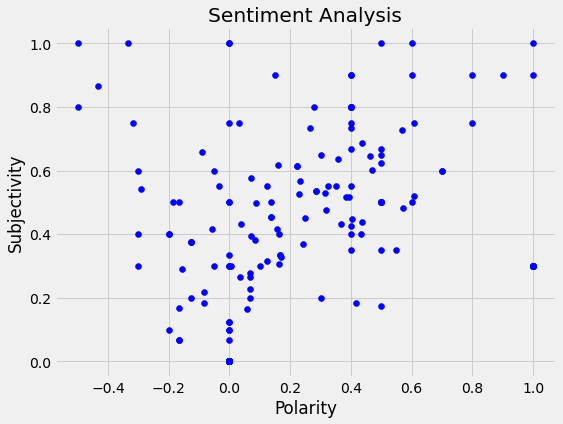

In [61]:
# Plot the polarity and subjectivity
plt.figure(figsize =(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color="Blue")

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [62]:
# Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0] / df.shape[0]) *100, 1)

52.5

In [63]:
# Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0] / df.shape[0]) *100, 1)

14.5

<function matplotlib.pyplot.show>

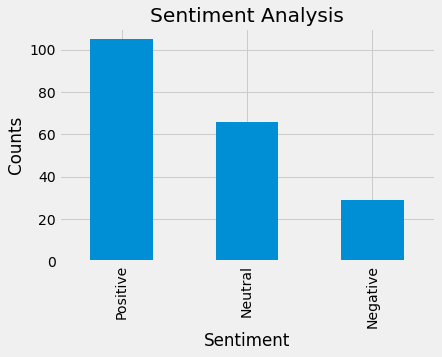

In [64]:
df['Analysis'].value_counts()

#plotand visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show

In [65]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,Here's how to make sense of the dizzying mix o...,0.750000,0.400000,Positive
1,"You've probably got TikTok, like a billion oth...",0.375000,-0.125000,Negative
2,You’ve got several different choices for runni...,0.300000,0.000000,Neutral
3,"Facebook plans to create 10,000 new jobs in th...",0.163636,0.059091,Positive
4,Canon is facing a lawsuit that could force it ...,0.000000,0.000000,Neutral
...,...,...,...,...
195,This huge TV retracts into the floor when you'...,0.900000,0.400000,Positive
196,A mechanical keyboard delivers the feel and fe...,0.500000,-0.166667,Negative
197,Get a full charge for an electric vehicle in j...,0.550000,0.350000,Positive
198,Need a new monitor? We've got recommendations ...,0.454545,0.136364,Positive


In [66]:
df.describe()

,Subjectivity,Polarity
count,200.000000,200.000000
mean,0.366813,0.190761
std,0.298875,0.324433
min,0.000000,-0.500000
25%,0.000000,0.000000
50%,0.358929,0.062879
75%,0.554167,0.400000
max,1.000000,1.000000


**TOKENIZATION**

Tokenization is the process of converting text into tokens before transforming it into vectors. It is also easier to filter out unnecessary tokens. For example, a document into paragraphs or sentences into words. In this case we are tokenising the tweets into words

In [67]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r"\w+")

In [68]:
df['Tweets']=df['Tweets'].apply(str)
df['Tweets']=df['Tweets'].apply(regexp.tokenize)
df.head(10)

,Tweets,Subjectivity,Polarity,Analysis
0,"[Here, s, how, to, make, sense, of, the, dizzy...",0.750000,0.400000,Positive
1,"[You, ve, probably, got, TikTok, like, a, bill...",0.375000,-0.125000,Negative
2,"[You, ve, got, several, different, choices, fo...",0.300000,0.000000,Neutral
3,"[Facebook, plans, to, create, 10, 000, new, jo...",0.163636,0.059091,Positive
4,"[Canon, is, facing, a, lawsuit, that, could, f...",0.000000,0.000000,Neutral
5,"[Which, PSU, should, you, buy, This, guide, wi...",0.333333,0.000000,Neutral
6,"[These, are, the, best, robot, vacuums, you, l...",0.183333,0.416667,Positive
7,"[Have, you, heard, stories, about, PPL, people...",0.733333,0.266667,Positive
8,"[See, all, the, buying, advice, you, need, to,...",1.000000,0.000000,Neutral
9,"[If, your, PC, is, sluggish, or, you, re, gett...",0.000000,0.000000,Neutral


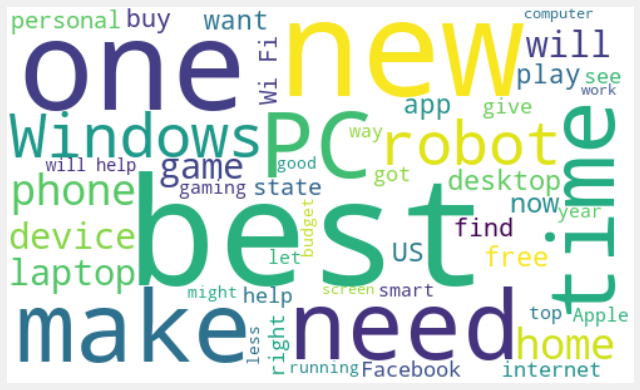

In [69]:
# Building a word cloud for the cleaned data
wordcloud = WordCloud(background_color='white', width=500, height=300, stopwords=stopwords,max_words=50, max_font_size=120, random_state=21).generate(allWords)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [70]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
df['Tweets'] = df['Tweets'].apply(lambda x: [item for item in x if item not in list_stop_words])
df.head(10
        )


,Tweets,Subjectivity,Polarity,Analysis
0,"[Here, make, sense, dizzying, mix, mobile, pro...",0.750000,0.400000,Positive
1,"[You, probably, got, TikTok, like, billion, pe...",0.375000,-0.125000,Negative
2,"[You, got, several, different, choices, runnin...",0.300000,0.000000,Neutral
3,"[Facebook, plans, create, 10, 000, new, jobs, ...",0.163636,0.059091,Positive
4,"[Canon, facing, lawsuit, could, force, change,...",0.000000,0.000000,Neutral
5,"[Which, PSU, buy, This, guide, give, brief, ru...",0.333333,0.000000,Neutral
6,"[These, best, robot, vacuums, find, 300, less]",0.183333,0.416667,Positive
7,"[Have, heard, stories, PPL, people, giving, te...",0.733333,0.266667,Positive
8,"[See, buying, advice, need, land, lightest, la...",1.000000,0.000000,Neutral
9,"[If, PC, sluggish, getting, worrying, error, m...",0.000000,0.000000,Neutral


In [72]:
# Removing small words (less than lenth 2 such as "it", "as", "no") and removing capital letters
df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join([w for w in x if len(w)>4]))
df['Tweets'] = df['Tweets'].str.lower()
df.head(10)

,Tweets,Subjectivity,Polarity,Analysis
0,sense dizzying mobile processors market powerf...,0.750000,0.400000,Positive
1,probably tiktok billion people,0.375000,-0.125000,Negative
2,several different choices running windows appl...,0.300000,0.000000,Neutral
3,facebook plans create european union years bud...,0.163636,0.059091,Positive
4,canon facing lawsuit could force change printe...,0.000000,0.000000,Neutral
5,which guide brief rundown desktop power supply...,0.333333,0.000000,Neutral
6,these robot vacuums,0.183333,0.416667,Positive
7,heard stories people giving texters ignorant m...,0.733333,0.266667,Positive
8,buying advice lightest laptop possible,1.000000,0.000000,Neutral
9,sluggish getting worrying error messages might...,0.000000,0.000000,Neutral


In [73]:
from wordcloud import WordCloud
all_words = ''.join([word for word in df['Tweets']])
#printing some
all_words[0:100]

'sense dizzying mobile processors market powerful laptop moneyprobably tiktok billion peopleseveral d'

**STEMMING AND LEMMATIZATION**

The next step is to use stemming or lemmatization methods and is very important for any text mining problem. Stemming and Lemmatization are Text Normalization  techniques in the field of Natural Language Processing that are used to prepare text, words, and documents for further processing. This is done to build common words for the words with similar root and context which makes it easier to model using classification algorithms. Like for example, play, playing and played all mean the same but are different words.

In [74]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_tokenizer = WordNetLemmatizer()
df['Tweets'] = df['Tweets'].apply(wordnet_tokenizer.lemmatize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


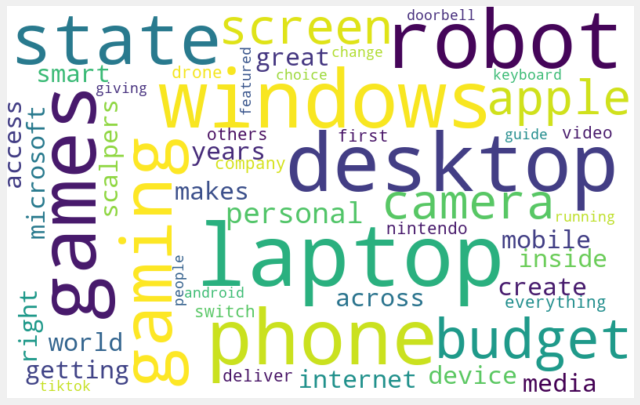

In [81]:
all_words = ''.join([word for word in df['Tweets']])
all_words
wordcloud = WordCloud(background_color= 'white', width=800, height=500, random_state=21, max_font_size=110, max_words = 50).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We see that cleaned data gives a better picture of the trending topics after the noise has been cleared out and the important topics emerge more clearly

In [82]:
pos = df[df['Analysis'] == 'Positive']
neg = df[df['Analysis'] == 'Negative']
pos_sentiment_words = ''.join([word for word in pos['Tweets']])   #words from the tweets that are positive
neg_sentiment_words = ''.join([word for word in neg['Tweets']])   ##words from the tweets that are negative

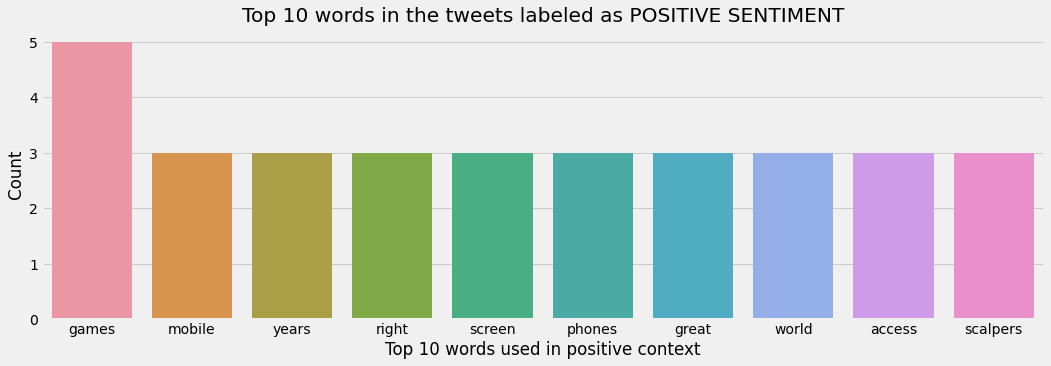

In [83]:
list_pos_words = [ x for x in pos_sentiment_words.split()]   #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_pos_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())})  #data frame of words and count
# selecting top 10 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 10 words used in positive context')
plt.title("Top 10 words in the tweets labeled as POSITIVE SENTIMENT")
plt.show()

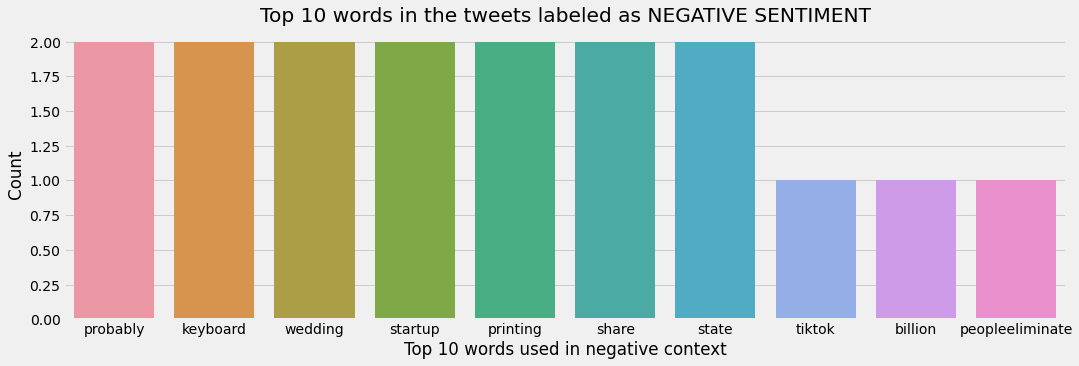

In [84]:
list_neg_words = [ x for x in neg_sentiment_words.split()]   #list of positive sentiment words
freq_dis_pos = nltk.FreqDist(list_neg_words)   #number of occurances of each word
freq_dataframe = pd.DataFrame({'Words': list(freq_dis_pos.keys()), 'Count': list(freq_dis_pos.values())})  #data frame of words and count
# selecting top 10 most frequent hashtags
freq_dataframe = freq_dataframe.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=freq_dataframe, x= "Words", y = "Count")
ax.set(ylabel = 'Count')
ax.set(xlabel = 'Top 10 words used in negative context')
plt.title("Top 10 words in the tweets labeled as NEGATIVE SENTIMENT")

plt.show()

**SO WHAT?**


The sentiment analysis gives the company a clear picture of the handles of key influencers on twitter and what is being talked about at a particular product or brand. Alternatively data can be scraped about a given topic or hashtag which may provide context.


**CONCLUSION**

We followed several steps to get the twitter sentiment analysis by handle which sufficiently solves the business problem and also satisfies the analytical objective. We acheived this by pre-processing data to get cleaner data. We used several techniques such as visualization, tokenization, removing stopwords, lemmatization and normalization of the the text to achieve this.

**MODEL IMPROVEMENT:**

Though the project sufficiently satisfies the requirements, we can tune it further by extending it to other languages, having more sophisticated text cleaning methods to further improve the results. We can also train the data with different models and performing bootstrapping, cross validation and additional visualizations.

# New Section